In [2]:
from pathlib import Path
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import prepare_tfr_data, project_spectral_power

In [10]:
epochs = mne.read_epochs("subj_03_day_3_r_epo.fif")

Reading /Users/valery/PycharmProjects/Neuromatch_2022_EcoG_movements/data/subj_03_day_3_r_epo.fif ...
    Found the data of interest:
        t =   -5500.00 ...    5500.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Adding metadata with 21 columns
198 matching events found
No baseline correction applied
0 projection items activated


In [11]:
epochs.metadata

,day,time,event_timestamp,mvmt,vid_name,event_frame_idx,false_pos,reach_duration,reach_r,reach_a,...,other_reach_overlap,bimanual,other_lead_lag,patient_id,I_over_C_ratio,r_wrist_x,r_wrist_y,l_wrist_x,l_wrist_y,audio_ratio
0,3,349096,349096,r_wrist,cb46fd46_5_0269.avi,2687,1,18,129.255291,153.922111,...,0,0,NaN,cb46fd46,0.058799,"[159.2968201637, 159.3015785217, 161.610570669...","[260.5095117688, 259.8508704752, 259.686334729...","[363.4200232029, 363.6931707263, 363.693170726...","[269.3371145725, 269.275007844, 269.3371145725...",0.277828
1,3,357329,357329,r_wrist,cb46fd46_5_0269.avi,2934,1,30,157.093448,143.920066,...,0,0,NaN,cb46fd46,0.032168,"[272.0346722603, 272.0346722603, 272.317434787...","[164.272222966, 164.0334121138, 163.8919103295...","[366.0338521004, 365.9118920565, 366.033852100...","[269.7757759094, 269.7757759094, 269.775775909...",0.262430
2,3,11478566,11478566,r_wrist,cb46fd46_5_0362.avi,1857,0,38,114.913287,-67.822059,...,38,1,-18.0,cb46fd46,0.058791,"[232.765100956, 232.7682571411, 232.7682571411...","[305.3812096119, 305.3606238365, 305.334280967...","[397.4345211983, 397.4842261076, 397.484226107...","[219.0111321211, 219.1953587532, 219.195358753...",0.279697
3,3,11481000,11481000,r_wrist,cb46fd46_5_0362.avi,1930,0,66,129.378680,166.344976,...,66,1,-30.0,cb46fd46,0.814901,"[265.3709244728, 268.0208016299, 270.901381015...","[202.6973885298, 201.5245435238, 200.273917675...","[393.4012322426, 393.4012322426, 393.401232242...","[219.5476782024, 219.5476782024, 219.547678202...",0.275339
4,3,19725563,19725563,r_wrist,cb46fd46_5_0431.avi,850,0,38,62.666331,38.884473,...,7,1,26.0,cb46fd46,0.049987,"[205.2776894569, 205.2776894569, 205.277689456...","[116.6471176147, 116.6251044869, 116.587120294...","[291.0424515009, 291.0424515009, 291.042451500...","[163.8678843379, 163.8678843379, 163.867884337...",0.148695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3,73412341,73412341,r_wrist,cb46fd46_7_0367.avi,2386,0,13,43.330872,-130.143624,...,12,1,2.0,cb46fd46,0.107886,"[184.6811180115, 184.6811180115, 184.640647411...","[202.4682883024, 202.5081958771, 202.508195877...","[340.9602084756, 340.9602084756, 340.960208475...","[234.9840437174, 234.9840437174, 234.964179158...",0.493998
196,3,73415941,73415941,r_wrist,cb46fd46_7_0367.avi,2494,0,31,82.450291,-97.639978,...,0,0,NaN,cb46fd46,0.002611,"[183.703119278, 183.7131268978, 183.7326180935...","[202.9964283705, 202.9475374222, 202.909341335...","[338.957100749, 338.939800024, 338.939800024, ...","[242.4824868441, 242.5029166937, 242.614224553...",0.492787
197,3,83585236,83585236,r_wrist,cb46fd46_7_0452.avi,1558,0,36,234.260583,-130.877526,...,0,0,NaN,cb46fd46,0.005729,"[292.9916315675, 292.9916315675, 292.991631567...","[254.8593919277, 254.8593919277, 254.859391927...","[469.9281426668, 469.9281426668, 469.929567456...","[271.9928011894, 272.1515250206, 272.151525020...",0.489058
198,3,83961273,83961273,r_wrist,cb46fd46_7_0455.avi,2030,0,80,94.847091,25.296243,...,52,1,19.0,cb46fd46,0.000000,"[228.1119900048, 228.2029083967, 228.211759224...","[204.664827168, 204.664827168, 204.664827168, ...","[525.1745374203, 525.1745374203, 525.174537420...","[180.334354043, 180.334354043, 180.334354043, ...",0.417448


    Using multitaper spectrum estimation with 7 DPSS windows


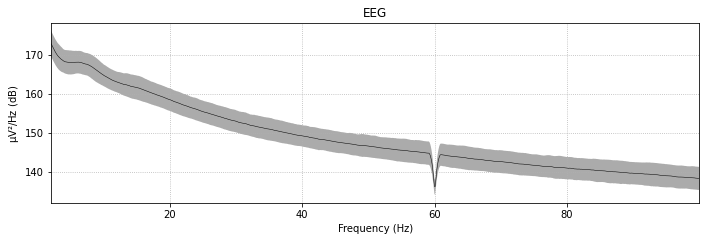

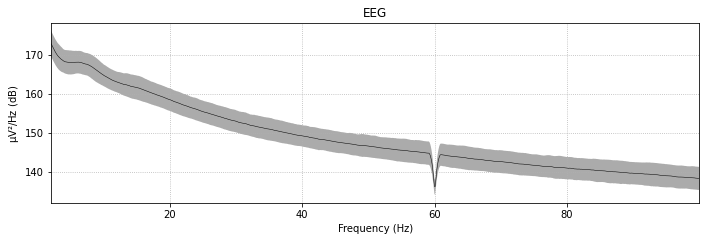

In [3]:
epochs.plot_psd(fmin=2., fmax=100., average=True, spatial_colors=False)

In [4]:
epochs.info

<Info | 11 non-empty values
 bads: 1 items (EEG0)
 ch_names: EEG0, EEG1, EEG2, EEG3, EEG4, EEG5, EEG6, EEG7, EEG8, EEG9, ...
 chs: 80 EEG
 custom_ref_applied: False
 dig: 80 items (80 EEG)
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 80
 projs: []
 sfreq: 500.0 Hz
>

In [5]:
epochs.get_data().shape

(198, 80, 5501)

Need more than one channel to make topography for eeg. Disabling interactivity.


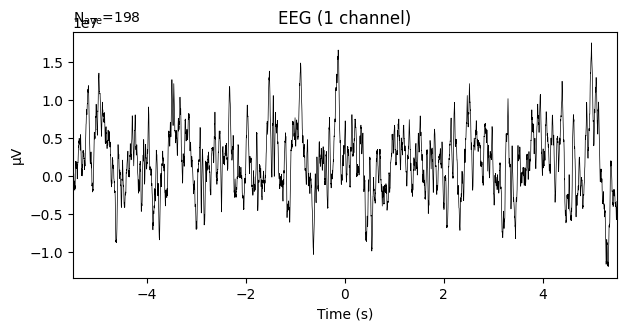

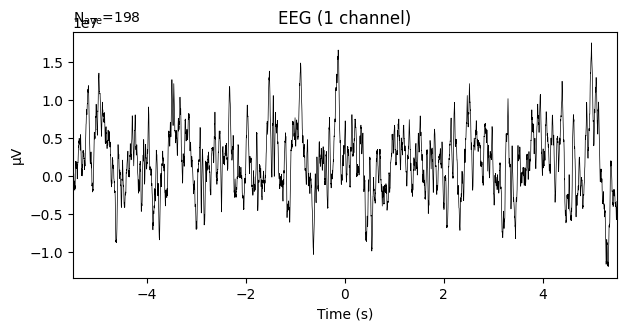

In [6]:
epochs.average().plot(picks=[5])

In [7]:
epochs.metadata

,day,time,event_timestamp,mvmt,vid_name,event_frame_idx,false_pos,reach_duration,reach_r,reach_a,...,other_reach_overlap,bimanual,other_lead_lag,patient_id,I_over_C_ratio,r_wrist_x,r_wrist_y,l_wrist_x,l_wrist_y,audio_ratio
0,3,349096,349096,r_wrist,cb46fd46_5_0269.avi,2687,1,18,129.255291,153.922111,...,0,0,NaN,cb46fd46,0.058799,"[159.2968201637, 159.3015785217, 161.610570669...","[260.5095117688, 259.8508704752, 259.686334729...","[363.4200232029, 363.6931707263, 363.693170726...","[269.3371145725, 269.275007844, 269.3371145725...",0.277828
1,3,357329,357329,r_wrist,cb46fd46_5_0269.avi,2934,1,30,157.093448,143.920066,...,0,0,NaN,cb46fd46,0.032168,"[272.0346722603, 272.0346722603, 272.317434787...","[164.272222966, 164.0334121138, 163.8919103295...","[366.0338521004, 365.9118920565, 366.033852100...","[269.7757759094, 269.7757759094, 269.775775909...",0.262430
2,3,11478566,11478566,r_wrist,cb46fd46_5_0362.avi,1857,0,38,114.913287,-67.822059,...,38,1,-18.0,cb46fd46,0.058791,"[232.765100956, 232.7682571411, 232.7682571411...","[305.3812096119, 305.3606238365, 305.334280967...","[397.4345211983, 397.4842261076, 397.484226107...","[219.0111321211, 219.1953587532, 219.195358753...",0.279697
3,3,11481000,11481000,r_wrist,cb46fd46_5_0362.avi,1930,0,66,129.378680,166.344976,...,66,1,-30.0,cb46fd46,0.814901,"[265.3709244728, 268.0208016299, 270.901381015...","[202.6973885298, 201.5245435238, 200.273917675...","[393.4012322426, 393.4012322426, 393.401232242...","[219.5476782024, 219.5476782024, 219.547678202...",0.275339
4,3,19725563,19725563,r_wrist,cb46fd46_5_0431.avi,850,0,38,62.666331,38.884473,...,7,1,26.0,cb46fd46,0.049987,"[205.2776894569, 205.2776894569, 205.277689456...","[116.6471176147, 116.6251044869, 116.587120294...","[291.0424515009, 291.0424515009, 291.042451500...","[163.8678843379, 163.8678843379, 163.867884337...",0.148695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3,73412341,73412341,r_wrist,cb46fd46_7_0367.avi,2386,0,13,43.330872,-130.143624,...,12,1,2.0,cb46fd46,0.107886,"[184.6811180115, 184.6811180115, 184.640647411...","[202.4682883024, 202.5081958771, 202.508195877...","[340.9602084756, 340.9602084756, 340.960208475...","[234.9840437174, 234.9840437174, 234.964179158...",0.493998
196,3,73415941,73415941,r_wrist,cb46fd46_7_0367.avi,2494,0,31,82.450291,-97.639978,...,0,0,NaN,cb46fd46,0.002611,"[183.703119278, 183.7131268978, 183.7326180935...","[202.9964283705, 202.9475374222, 202.909341335...","[338.957100749, 338.939800024, 338.939800024, ...","[242.4824868441, 242.5029166937, 242.614224553...",0.492787
197,3,83585236,83585236,r_wrist,cb46fd46_7_0452.avi,1558,0,36,234.260583,-130.877526,...,0,0,NaN,cb46fd46,0.005729,"[292.9916315675, 292.9916315675, 292.991631567...","[254.8593919277, 254.8593919277, 254.859391927...","[469.9281426668, 469.9281426668, 469.929567456...","[271.9928011894, 272.1515250206, 272.151525020...",0.489058
198,3,83961273,83961273,r_wrist,cb46fd46_7_0455.avi,2030,0,80,94.847091,25.296243,...,52,1,19.0,cb46fd46,0.000000,"[228.1119900048, 228.2029083967, 228.211759224...","[204.664827168, 204.664827168, 204.664827168, ...","[525.1745374203, 525.1745374203, 525.174537420...","[180.334354043, 180.334354043, 180.334354043, ...",0.417448


In [8]:
len(epochs.metadata.l_wrist_x[0])

150

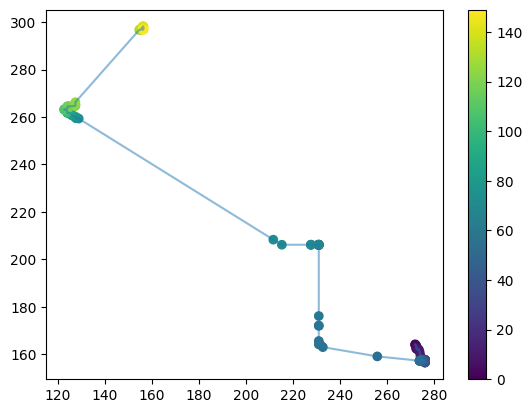

In [9]:
event = 1
plt.plot(epochs.metadata.r_wrist_x[event], epochs.metadata.r_wrist_y[event], '-',
         alpha = 0.5)
plt.scatter(epochs.metadata.r_wrist_x[event], epochs.metadata.r_wrist_y[event],
         c=np.arange(len(epochs.metadata.r_wrist_x[event])))
plt.colorbar()
plt.show()

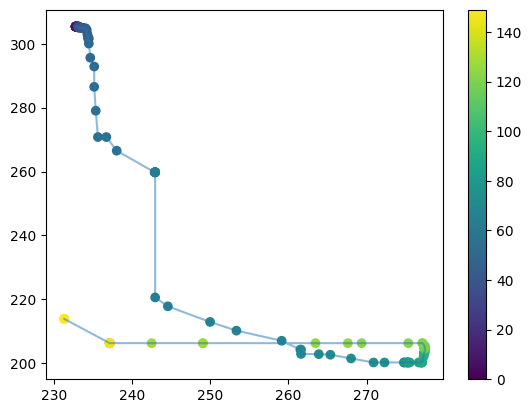

In [10]:
event = 2
plt.plot(epochs.metadata.r_wrist_x[event], epochs.metadata.r_wrist_y[event], '-',
         alpha = 0.5)
plt.scatter(epochs.metadata.r_wrist_x[event], epochs.metadata.r_wrist_y[event],
         c=np.arange(len(epochs.metadata.r_wrist_x[event])))
plt.colorbar()
plt.show()

In [11]:
%%time
power = prepare_tfr_data(epochs)

Dropped 11 epochs: 0, 1, 5, 12, 47, 114, 116, 118, 146, 183, 190
Computing power...
Adding metadata with 21 columns
Done computing power.
CPU times: user 3min 11s, sys: 1.33 s, total: 3min 13s
Wall time: 3min 13s


In [12]:
power.data.shape

(187, 80, 25, 91)

No baseline correction applied


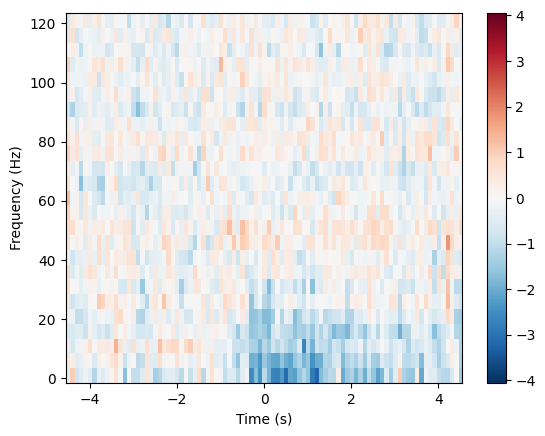

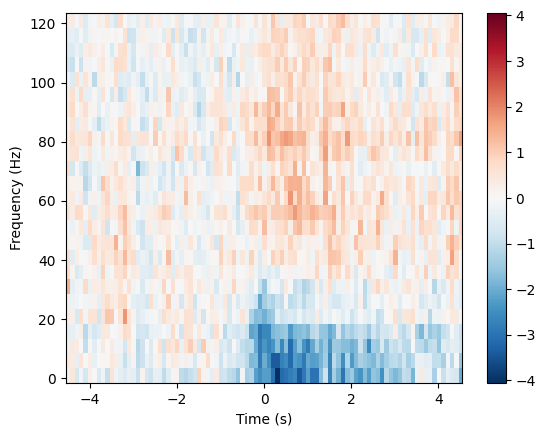

[<Figure size 640x480 with 2 Axes>, <Figure size 640x480 with 2 Axes>]

In [8]:
power.average().plot(picks=[56, 57])

In [19]:
mne.time_frequency.write_tfrs("power-tfr.h5", power)

In [20]:
power2 = mne.time_frequency.read_tfrs("power-tfr.h5")[0]

Reading power-tfr.h5 ...
Adding metadata with 21 columns


In [ ]:
%%time
fdata = "/Volumes/GoogleDrive/My Drive/NMA-22/naturalistic_arm_movements_ecog/data/Naturalistic reach ECoG data"
for file in Path(fdata).glob("*.fif"):
    epochs = mne.read_epochs(file)
    power = prepare_tfr_data(epochs)
    fname = file.stem + "-tfr.h5"
    folder = file.parent.parent / 'Naturalistic reach ECoG tfrs'
    mne.time_frequency.write_tfrs(folder / fname, power)
    print(f"{folder / fname} saved")

In [34]:
power2 = mne.time_frequency.read_tfrs(folder / fname)[0]

Reading /Volumes/GoogleDrive/My Drive/NMA-22/naturalistic_arm_movements_ecog/data/Naturalistic reach ECoG tfrs/subj_02_day_4_l_epo-tfr.h5 ...
Adding metadata with 21 columns


In [ ]:
power2.average().plot(picks=[56, 57, 20, 13, 44])

## Projecting spectral power to ROI

In [3]:
root = Path("/Volumes/GoogleDrive/My Drive/NMA-22/naturalistic_arm_movements_ecog/data")
tfr_data = root / "Naturalistic reach ECoG tfrs"
roi_data = root / "Naturalistic reach ECoG tfrs ROI"
proj_data =root / "ROI projection matrices and labels"
elec_dens_thresh = 3 #threshold for dipole density

In [5]:
n_subjs = 11
#Load in electrode to ROI weight matrices
for s in range(n_subjs):
    df = pd.read_csv(proj_data / f"aal_{str(s+1).zfill(2)}_elecs2ROI.csv")
    if s==0:
        elec_densities = df.iloc[0]
    else:
        elec_densities += df.iloc[0]
elec_densities = elec_densities/n_subjs

#Select ROI's that have electrode density above threshold
good_rois = np.nonzero(np.asarray(elec_densities)>elec_dens_thresh)[0]
roi_labels = df.columns.tolist()
print('Selected '+str(len(good_rois))+' regions')

Selected 8 regions


In [6]:
np.array(roi_labels)[good_rois]

array(['Precentral_L', 'Frontal_Mid_L', 'Postcentral_L', 'Parietal_Inf_L',
       'SupraMarginal_L', 'Temporal_Sup_L', 'Temporal_Mid_L',
       'Temporal_Inf_L'], dtype='<U20')

In [7]:
power_roi = project_spectral_power(
    str(tfr_data), str(proj_data), good_rois=good_rois, n_subjs=n_subjs, rem_bad_chans=True)

Reading /Volumes/GoogleDrive/My Drive/NMA-22/naturalistic_arm_movements_ecog/data/Naturalistic reach ECoG tfrs/subj_01_day_3_r_epo-tfr.h5 ...
Adding metadata with 21 columns
Reading /Volumes/GoogleDrive/My Drive/NMA-22/naturalistic_arm_movements_ecog/data/Naturalistic reach ECoG tfrs/subj_01_day_4_r_epo-tfr.h5 ...
Adding metadata with 21 columns
Reading /Volumes/GoogleDrive/My Drive/NMA-22/naturalistic_arm_movements_ecog/data/Naturalistic reach ECoG tfrs/subj_01_day_5_r_epo-tfr.h5 ...
Adding metadata with 21 columns
Reading /Volumes/GoogleDrive/My Drive/NMA-22/naturalistic_arm_movements_ecog/data/Naturalistic reach ECoG tfrs/subj_01_day_7_r_epo-tfr.h5 ...
Adding metadata with 21 columns
Reading /Volumes/GoogleDrive/My Drive/NMA-22/naturalistic_arm_movements_ecog/data/Naturalistic reach ECoG tfrs/subj_02_day_3_l_epo-tfr.h5 ...
Adding metadata with 21 columns
Reading /Volumes/GoogleDrive/My Drive/NMA-22/naturalistic_arm_movements_ecog/data/Naturalistic reach ECoG tfrs/subj_02_day_4_l_epo

In [10]:
# mne.time_frequency.write_tfrs(roi_data / "power-roi-all-patients.h5", power_roi, overwrite=True)
# np.save(roi_data / "power-roi-all-patients.npy", power_roi.data)
# power_roi.metadata_all.to_csv(roi_data / "power-roi-all-patients-metadata.csv")

In [8]:
# power_roi.metadata.shape
# power_roi.metadata_all
power_roi.metadata_all.shape

(5984, 22)

In [4]:
# data_test = mne.time_frequency.read_tfrs(roi_data / "power-roi-all-patients.h5")

Reading /Volumes/GoogleDrive/My Drive/NMA-22/naturalistic_arm_movements_ecog/data/Naturalistic reach ECoG tfrs ROI/power-roi-all-patients.h5 ...


<ipython-input-4-6a69651ba9fe>:1: RuntimeWarning: This filename (/Volumes/GoogleDrive/My Drive/NMA-22/naturalistic_arm_movements_ecog/data/Naturalistic reach ECoG tfrs ROI/power-roi-all-patients.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5 or _tfr.h5
  data_test = mne.time_frequency.read_tfrs(roi_data / "power-roi-all-patients.h5")


ValueError: metadata must have the same number of rows (5984) as events (121)

In [55]:
id_r = power_roi.metadata_all[power_roi.metadata_all['mvmt'] == 'r_wrist'].index
id_l = power_roi.metadata_all[power_roi.metadata_all['mvmt'] == 'l_wrist'].index
power_l = power_roi.copy()
power_l.data = power_roi.data[id_l]
power_r = power_roi.copy()
power_r.data = power_roi.data[id_r]

In [59]:
ave_l = power_l.average()
ave_r = power_r.average()

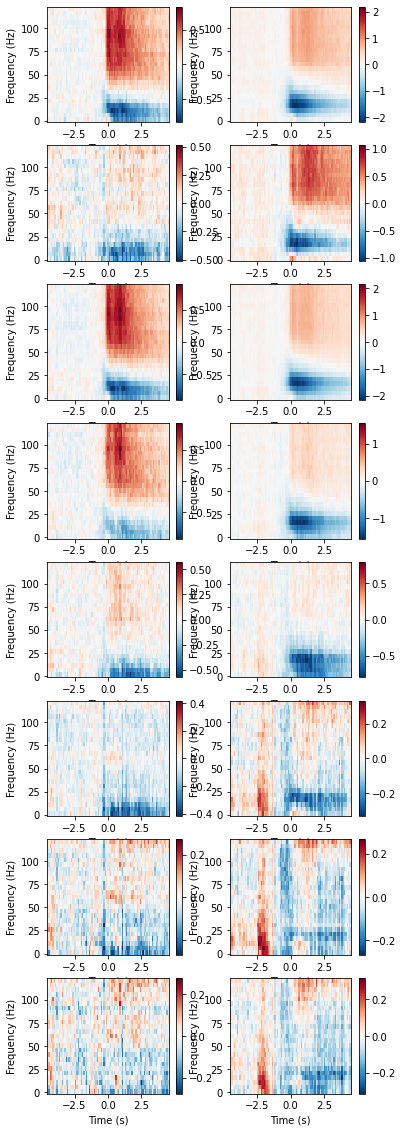

In [79]:
fig, ax = plt.subplots(8, 2, figsize=(6, 20))

for i in range(8):
    ave_l.plot(picks = [i], axes=ax[i, 0], show=False, verbose=0);
    ave_r.plot(picks = [i], axes=ax[i, 1], show=False, verbose=0);

plt.savefig(roi_data / 'l_r_tfr.png', dpi=200)
plt.show()

In [65]:
ax[0, :]

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

No baseline correction applied


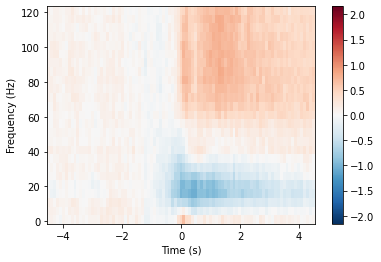

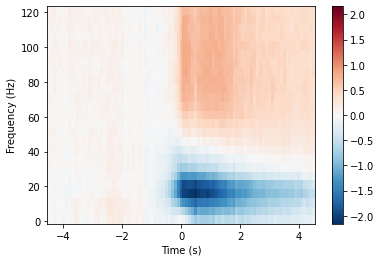

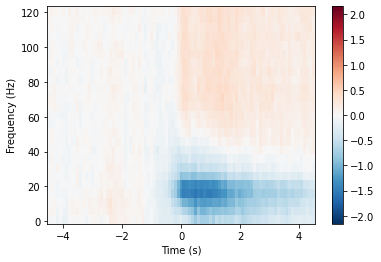

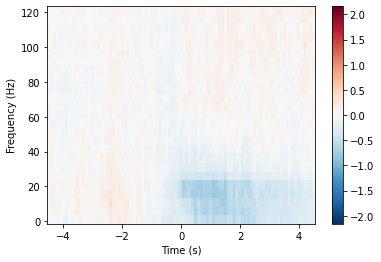

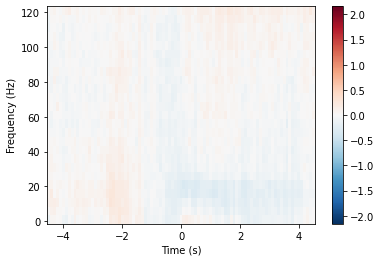

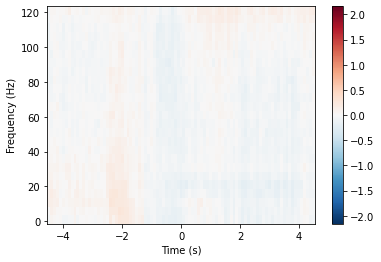

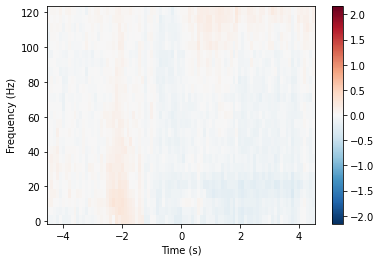

[<Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>]

In [62]:
ave_r.plot()

In [33]:
average = power_roi.average()

No baseline correction applied


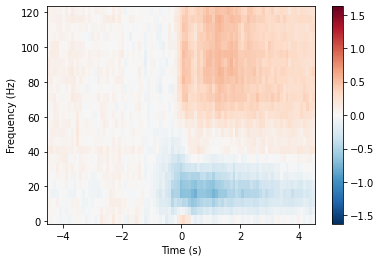

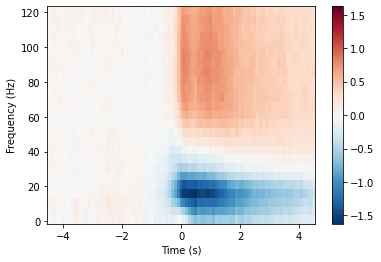

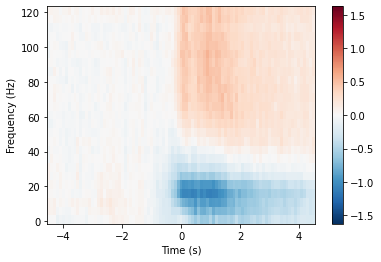

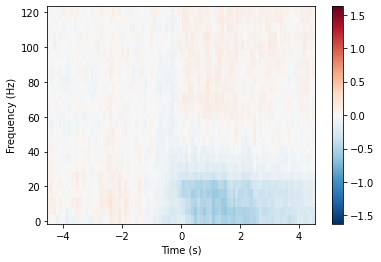

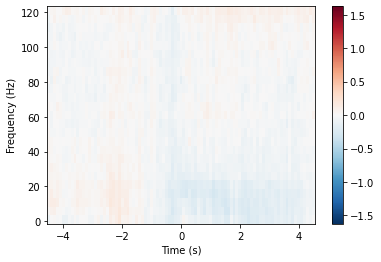

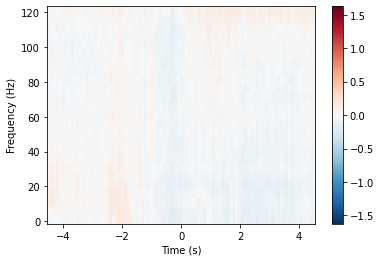

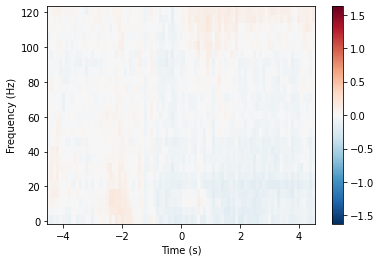

[<Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>]

In [34]:
average.plot()